구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 패키지 설치

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [3]:
path = '/content/drive/MyDrive/AIVLE/BIGP/data/'
normal_data = pd.read_csv(path + 'press_data_normal.csv', index_col=0)
outlier_data = pd.read_csv(path + 'outlier_data.csv', index_col=0)

# 데이터 기본 탐색

In [4]:
normal_data.head()

,TimeStamp,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
0,2022-07-12 00:00:00.019,0.116967,-0.176403,192.338730,0
1,2022-07-12 00:00:00.119,0.030080,-0.210895,217.004330,0
2,2022-07-12 00:00:00.219,-0.045794,-0.029424,197.510620,0
3,2022-07-12 00:00:00.319,0.047519,0.258642,156.607170,0
4,2022-07-12 00:00:00.419,0.020351,0.173777,93.236934,0


In [5]:
normal_data.tail()

,TimeStamp,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
19995,2022-07-12 01:16:55.428,0.009398,-0.053661,37.121181,0
19996,2022-07-12 01:16:55.528,0.110488,-0.001028,86.177121,0
19997,2022-07-12 01:16:55.628,0.041437,0.000096,106.352940,0
19998,2022-07-12 01:16:55.728,0.106401,-0.003026,114.143620,0
19999,2022-07-12 01:16:55.828,0.077280,0.088334,108.258020,0


In [6]:
outlier_data.head()

,TimeStamp,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
0,2022-07-17 10:51:07.943,0.293727,-0.540554,21.457675,1
1,2022-07-17 10:51:08.043,1.070320,-0.557382,-44.107442,1
2,2022-07-17 10:51:08.143,0.908692,0.063108,25.033954,1
3,2022-07-17 10:51:08.243,0.235921,0.509321,-101.327910,1
4,2022-07-17 10:51:16.724,0.315538,0.205315,34.570698,1


In [7]:
outlier_data.tail()

,TimeStamp,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
595,2022-07-17 10:53:53.140,-0.036185,-0.017074,172.85349,1
596,2022-07-17 10:53:53.240,-0.043238,0.042993,194.31117,1
597,2022-07-17 10:53:53.340,-0.032542,0.016003,189.54279,1
598,2022-07-17 10:53:53.440,-0.068095,0.029591,171.66140,1
599,2022-07-17 10:53:53.540,-0.048900,-0.007063,195.50326,1


In [8]:
normal_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        20000 non-null  object 
 1   AI0_Vibration    20000 non-null  float64
 2   AI1_Vibration    20000 non-null  float64
 3   AI2_Current      20000 non-null  float64
 4   Equipment_state  20000 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ MB


In [9]:
outlier_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        600 non-null    object 
 1   AI0_Vibration    600 non-null    float64
 2   AI1_Vibration    600 non-null    float64
 3   AI2_Current      600 non-null    float64
 4   Equipment_state  600 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 44.3+ KB


In [10]:
normal_data.describe()

,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
count,20000.000000,20000.000000,20000.000000,20000.0
mean,-0.000094,-0.000093,1.446209,0.0
std,0.070634,0.118888,122.664494,0.0
min,-0.314570,-0.366498,-271.568330,0.0
25%,-0.044168,-0.069247,-101.311693,0.0
50%,-0.000171,-0.009317,1.849830,0.0
75%,0.044011,0.060176,103.844418,0.0
max,0.351699,0.399782,273.235000,0.0


In [11]:
outlier_data.describe()

,AI0_Vibration,AI1_Vibration,AI2_Current,Equipment_state
count,600.000000,600.000000,600.000000,600.0
mean,0.007578,-0.008137,57.329741,1.0
std,0.447928,0.241226,153.172619,0.0
min,-1.502735,-0.751253,-399.351170,1.0
25%,-0.116400,-0.136426,-33.378605,1.0
50%,0.015771,0.002161,53.644187,1.0
75%,0.092859,0.171432,146.627440,1.0
max,1.803204,0.509321,538.826050,1.0


상관계수

In [24]:
col = ['AI0_Vibration', 'AI1_Vibration', 'AI2_Current']

In [23]:
normal_data[col].corr()

,AI0_Vibration,AI1_Vibration,AI2_Current
AI0_Vibration,1.000000,0.368274,0.004091
AI1_Vibration,0.368274,1.000000,0.000578
AI2_Current,0.004091,0.000578,1.000000


In [25]:
outlier_data[col].corr()

,AI0_Vibration,AI1_Vibration,AI2_Current
AI0_Vibration,1.000000,-0.380586,0.011691
AI1_Vibration,-0.380586,1.000000,0.033684
AI2_Current,0.011691,0.033684,1.000000


# 데이터 시각화

### 라인 플롯
- 시간 흐름에 따른 패턴 비교

정상 데이터는 시간 흐름에 따라 비교적 일정한 패턴을 보인다.
비정상 데이터는 정상 데이터에 비해 값의 변동 폭이 훨씬 크고 불규칙한 패턴을 보인다.

In [12]:
normal_data['TimeStamp'] = pd.to_datetime(normal_data['TimeStamp'])
outlier_data['TimeStamp'] = pd.to_datetime(outlier_data['TimeStamp'])

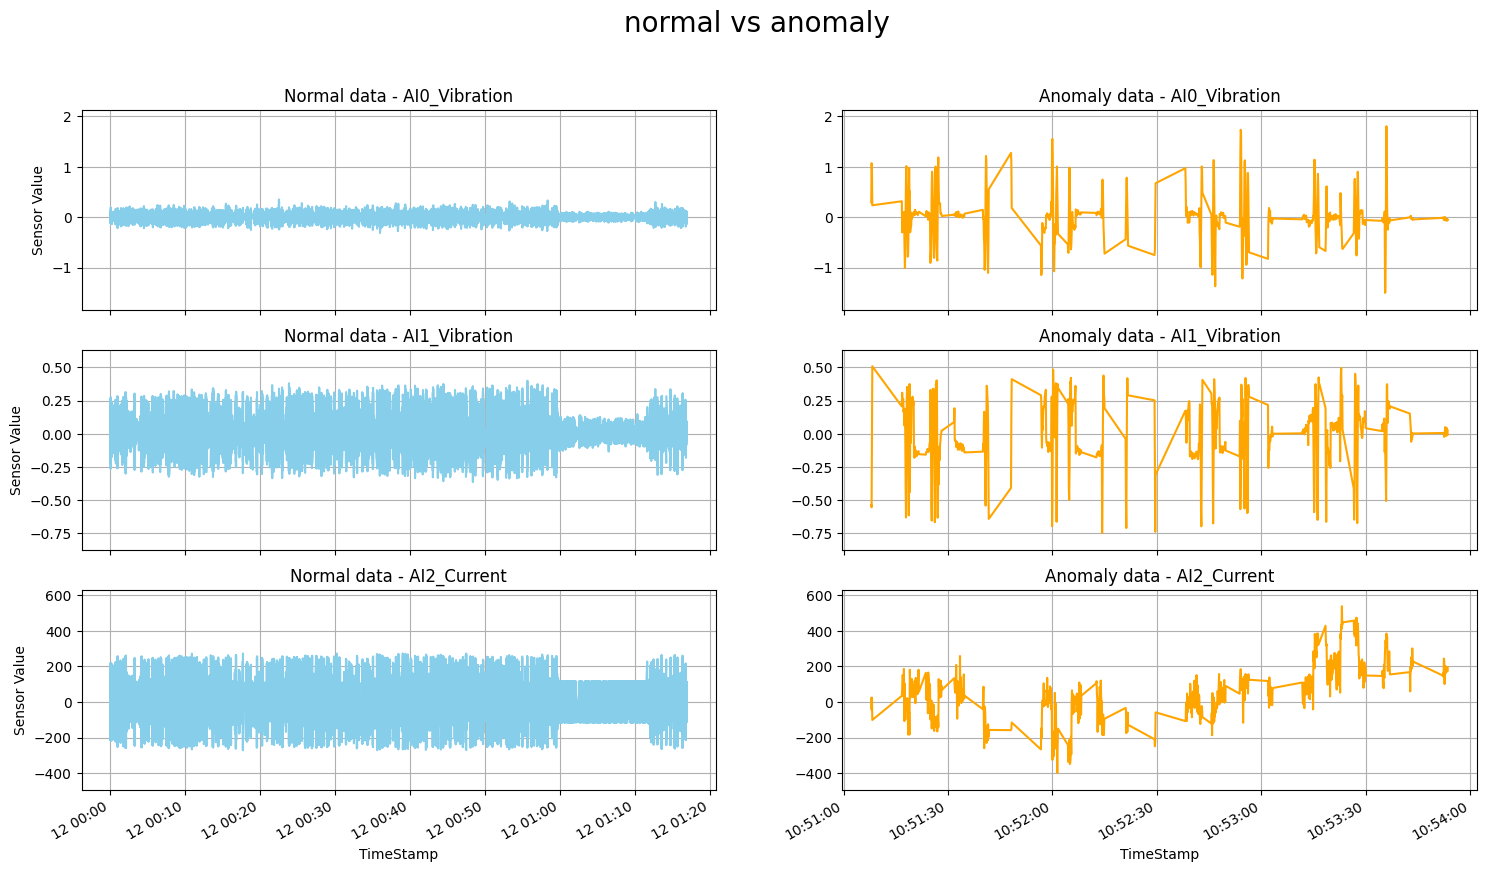

In [13]:
# 시각화할 센서 리스트
col = ['AI0_Vibration', 'AI1_Vibration', 'AI2_Current']

# 3행 2열의 그래프 영역 생성
fig, axes = plt.subplots(len(col), 2, figsize=(18, 10))
fig.suptitle('normal vs anomaly', fontsize=20)

for i, feature in enumerate(col):
    y_min = min(normal_data[feature].min(), outlier_data[feature].min())
    y_max = max(normal_data[feature].max(), outlier_data[feature].max())
    padding = (y_max - y_min) * 0.1
    axes[i, 0].set_ylim(y_min - padding, y_max + padding)
    axes[i, 1].set_ylim(y_min - padding, y_max + padding)

    # --- 왼쪽: 정상 데이터 플롯 ---
    # axes[i, 0]는 i행 0열, 즉 왼쪽 칸을 의미
    axes[i, 0].plot(normal_data['TimeStamp'], normal_data[feature], color='skyblue')
    axes[i, 0].set_title(f'Normal data - {feature}')
    axes[i, 0].set_ylabel('Sensor Value')
    axes[i, 0].grid(True)

    # --- 오른쪽: 비정상 데이터 플롯 ---
    # axes[i, 1]는 i행 1열, 즉 오른쪽 칸을 의미
    axes[i, 1].plot(outlier_data['TimeStamp'], outlier_data[feature], color='orange')
    axes[i, 1].set_title(f'Anomaly data - {feature}')
    axes[i, 1].grid(True)

# 마지막 행에만 x축 라벨 표시
axes[-1, 0].set_xlabel('TimeStamp')
axes[-1, 1].set_xlabel('TimeStamp')

fig.autofmt_xdate()
plt.show()

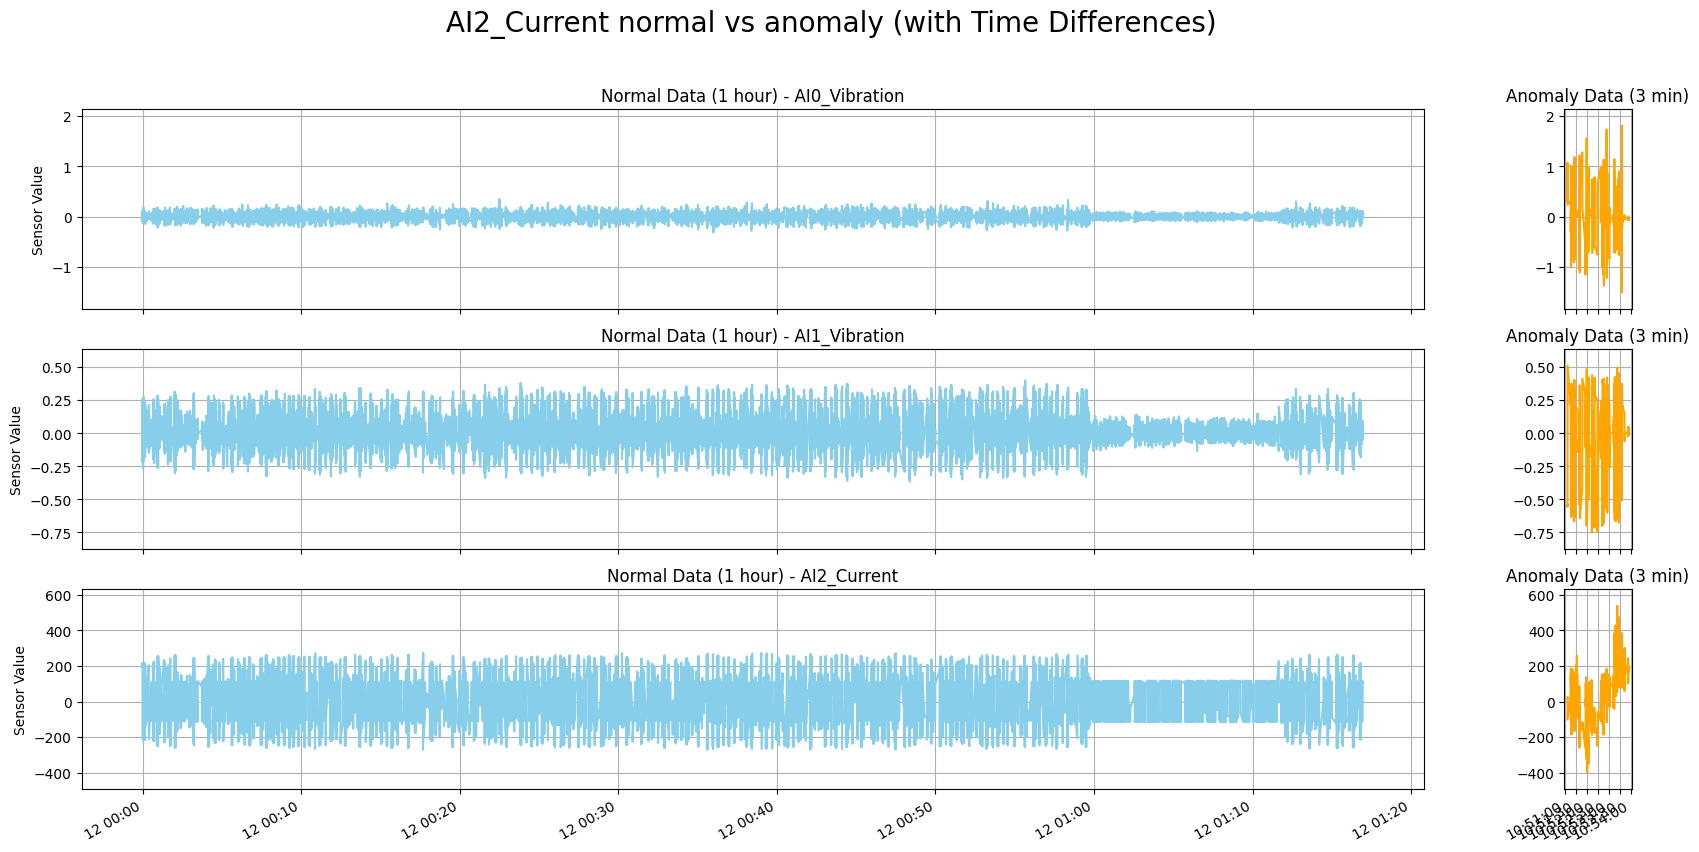

In [14]:

fig = plt.figure(figsize=(20, 10))
fig.suptitle(f'{feature} normal vs anomaly (with Time Differences)', fontsize=20)

gs = gridspec.GridSpec(nrows=len(col), ncols=2, width_ratios=[20,1], figure=fig)

for i, feature in enumerate(col):
    # --- 왼쪽: 정상 데이터 플롯 (넓게) ---
    ax0 = fig.add_subplot(gs[i, 0])
    ax0.plot(normal_data['TimeStamp'], normal_data[feature], color='skyblue')
    ax0.set_title(f'Normal Data (1 hour) - {feature}')
    ax0.set_ylabel('Sensor Value')
    ax0.grid(True)

    # --- 오른쪽: 비정상 데이터 플롯 (좁게) ---
    ax1 = fig.add_subplot(gs[i, 1])
    ax1.plot(outlier_data['TimeStamp'], outlier_data[feature], color='orange')
    ax1.set_title(f'Anomaly Data (3 min)')
    ax1.grid(True)

    # Y축 범위 동기화
    y_min = min(normal_data[feature].min(), outlier_data[feature].min())
    y_max = max(normal_data[feature].max(), outlier_data[feature].max())
    padding = (y_max - y_min) * 0.1
    ax0.set_ylim(y_min - padding, y_max + padding)
    ax1.set_ylim(y_min - padding, y_max + padding)

fig.autofmt_xdate()
plt.show()

### KDE 플롯

비정상 데이터의 분포가 정상 데이터의 분포보다 더 넓게 퍼져 있는 것으로 보인다. 비정상 상태에서 센서 값의 변동성이 커진다.

AI2_Current의 경우 비정상 데이터의 분포가 정상 데이터보다 넓으면서 중앙값도 차이가 있다.

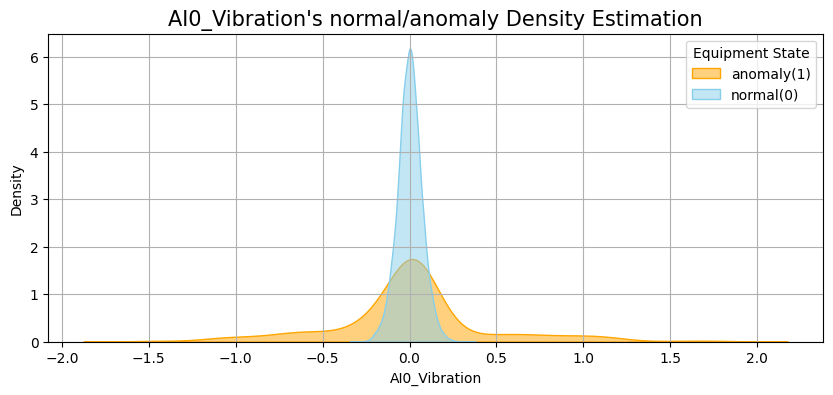

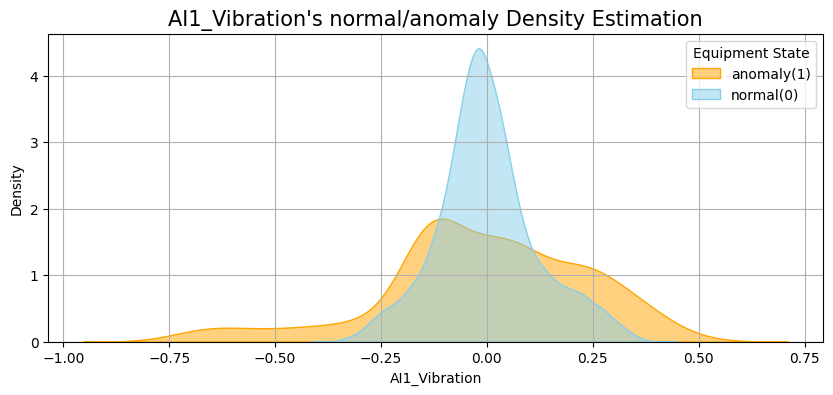

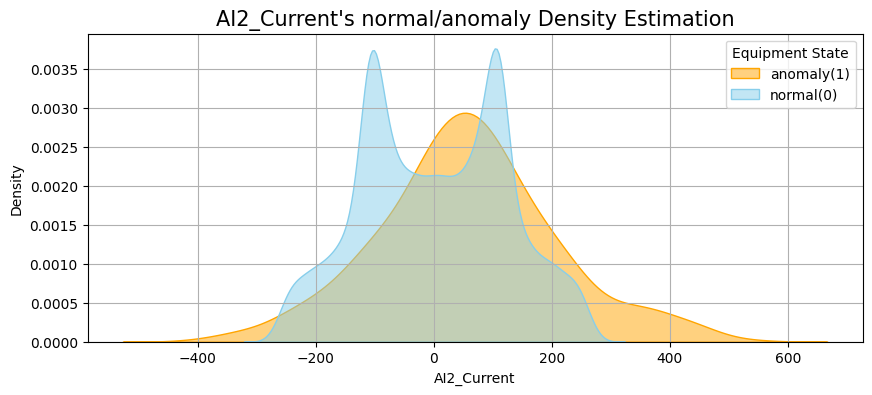

In [19]:
combined_df = pd.concat([normal_data, outlier_data], ignore_index=True)

for feature in col:
    plt.figure(figsize=(10, 4))

    sns.kdeplot(
        data=combined_df, x=feature, hue='Equipment_state',
        fill=True,
        common_norm=False,     # 각 분포를 독립적으로 정규화 (데이터 개수 영향 제거)
        palette={0: 'skyblue', 1: 'orange'},
        alpha=0.5,             # 투명도 조절
        linewidth=1            # 경계선 제거
    )

    plt.title(f'{feature}\'s normal/anomaly Density Estimation', fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Equipment State', labels=['anomaly(1)', 'normal(0)'])
    plt.grid(True)
    plt.show()

### 박스 플롯
진동은 이상 상태일 때 더 큰 폭으로 움직이고 이상치가 더 많이 나타난다.
전류는 중앙값이 정상일 때보다 이상일 때 더 높고, 극단적인 이상치가 많이 나타난다.

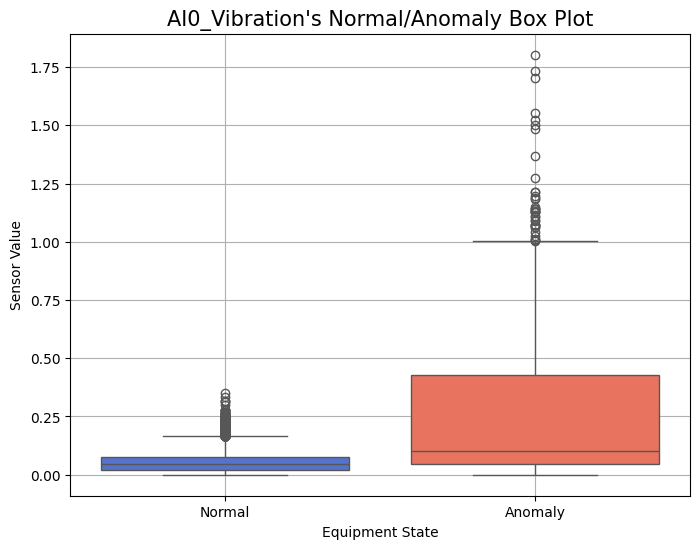

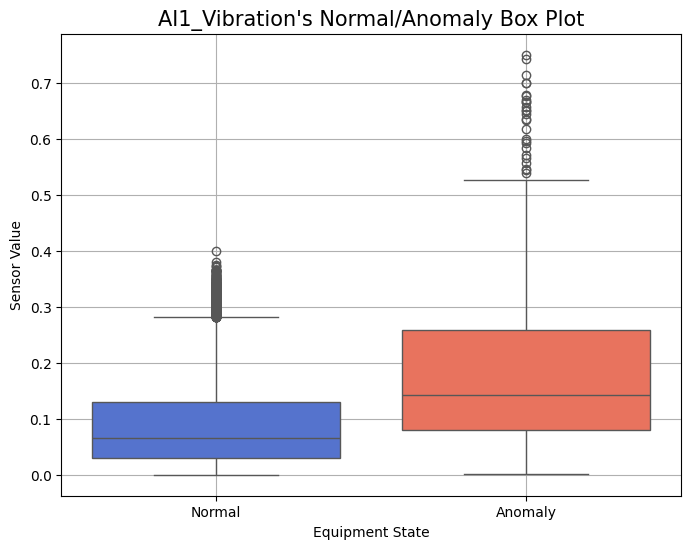

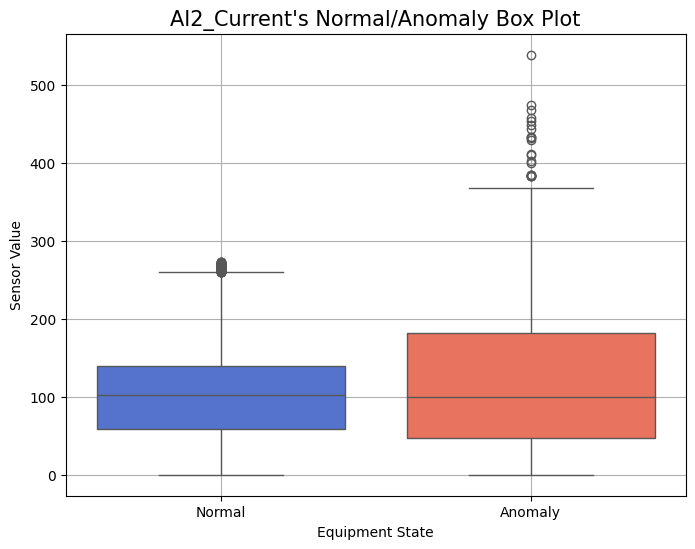

In [29]:
for feature in col:
    plt.figure(figsize=(8, 6))

    # seaborn의 boxplot 사용
    sns.boxplot(
        data=combined_df,
        x='Equipment_state', # x축에는 그룹을 나눌 기준(정상/비정상)
        y=feature,           # y축에는 비교할 센서 값
        palette={'0': 'royalblue', '1': 'tomato'} # 색상 지정
    )

    plt.title(f'{feature}\'s Normal/Anomaly Box Plot', fontsize=15)
    # x축 눈금 라벨을 알아보기 쉽게 변경
    plt.xticks(ticks=[0, 1], labels=['Normal', 'Anomaly'])
    plt.xlabel('Equipment State')
    plt.ylabel('Sensor Value')
    plt.grid(True)
    plt.show()

## 진폭으로 변환 후

In [26]:
normal_data[col] = normal_data[col].applymap(lambda x: abs(x))
outlier_data[col] = outlier_data[col].applymap(lambda x: abs(x))

### 라인 플롯

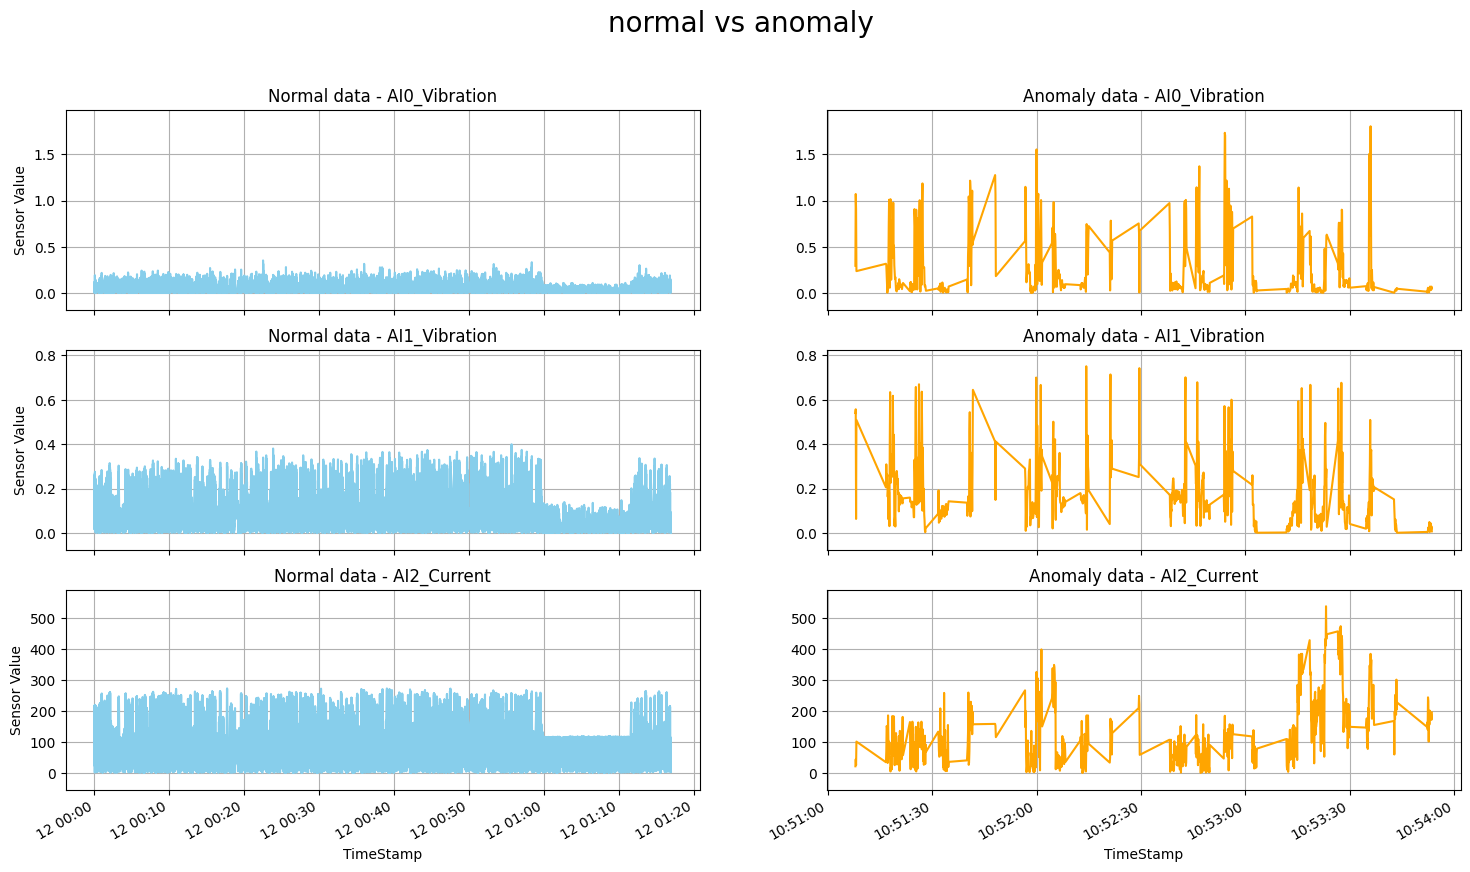

In [27]:
fig, axes = plt.subplots(len(col), 2, figsize=(18, 10))
fig.suptitle('normal vs anomaly', fontsize=20)

for i, feature in enumerate(col):
    y_min = min(normal_data[feature].min(), outlier_data[feature].min())
    y_max = max(normal_data[feature].max(), outlier_data[feature].max())
    padding = (y_max - y_min) * 0.1
    axes[i, 0].set_ylim(y_min - padding, y_max + padding)
    axes[i, 1].set_ylim(y_min - padding, y_max + padding)

    axes[i, 0].plot(normal_data['TimeStamp'], normal_data[feature], color='skyblue')
    axes[i, 0].set_title(f'Normal data - {feature}')
    axes[i, 0].set_ylabel('Sensor Value')
    axes[i, 0].grid(True)

    axes[i, 1].plot(outlier_data['TimeStamp'], outlier_data[feature], color='orange')
    axes[i, 1].set_title(f'Anomaly data - {feature}')
    axes[i, 1].grid(True)

axes[-1, 0].set_xlabel('TimeStamp')
axes[-1, 1].set_xlabel('TimeStamp')

fig.autofmt_xdate()
plt.show()